### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

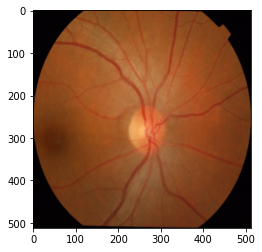

(50, 512, 512, 3)


(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
lab_train = convert_to_lab_color(img_train)
len(lab_train)

50

### Test images

In [5]:
lab_test = convert_to_hsv_color(img_test)
len(lab_test)

51

#### Generator of augmented data:

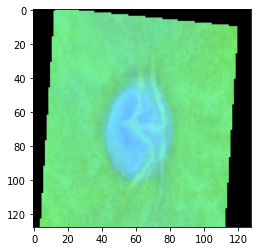

In [6]:
gen = data_generator(lab_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


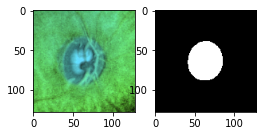

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(lab_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE

model = create_compile_model(img_size)
history_cup = train(lab_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_lab', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

3/3 [==============================] - 13s 5s/step - loss: 1.6500 - mean_IOU_gpu: 0.0626 - dice_metric: 0.1173 - val_loss: 1.4713 - val_mean_IOU_gpu: 0.0725 - val_dice_metric: 0.1342


### Visual check

image #0


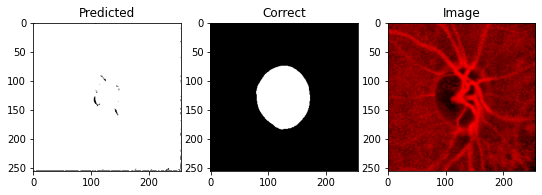

IOU: 0.11784816533327103
Dice: 0.21084824795995338
image #1


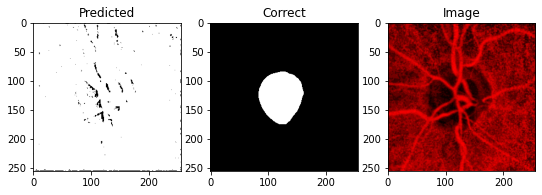

IOU: 0.07304766774177551
Dice: 0.1361498971829568
image #2


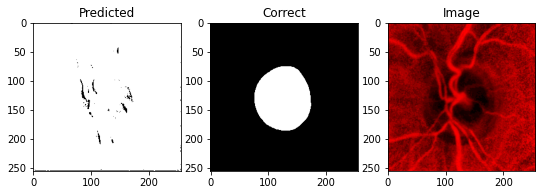

IOU: 0.12409790605306625
Dice: 0.2207955414708775
image #3


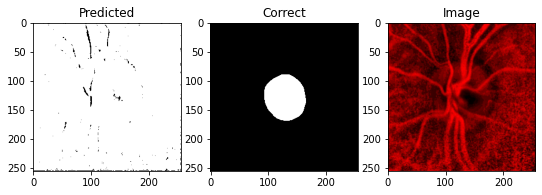

IOU: 0.06758345663547516
Dice: 0.12661015721220026
image #4


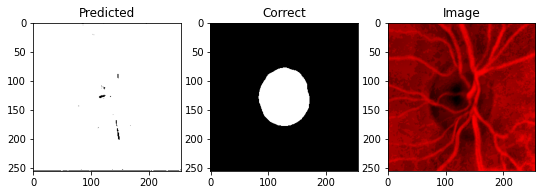

IOU: 0.10418327897787094
Dice: 0.18870649668083214
image #5


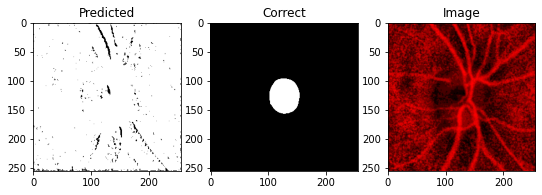

IOU: 0.03846093639731407
Dice: 0.07407295475837891
image #6


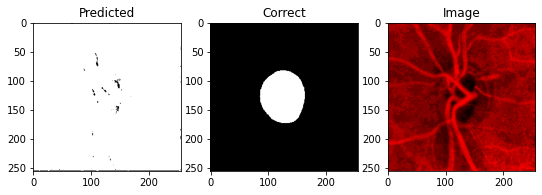

IOU: 0.08215983957052231
Dice: 0.15184418677175177
image #7


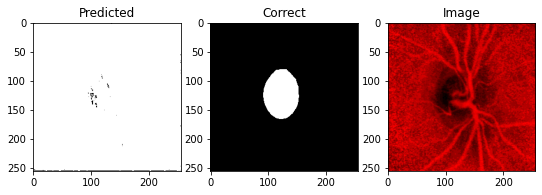

IOU: 0.06100064516067505
Dice: 0.11498700548657234
image #8


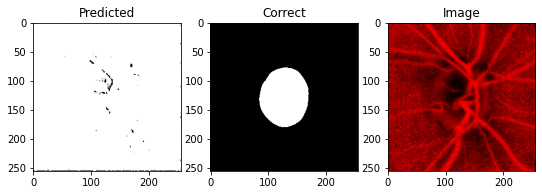

IOU: 0.10144861042499542
Dice: 0.1842094264179333
image #9


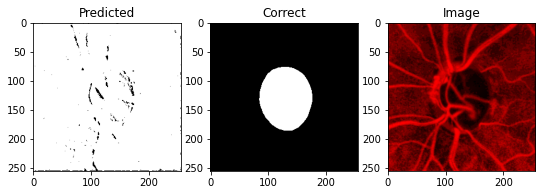

IOU: 0.1133621335029602
Dice: 0.20363928655570493
image #10


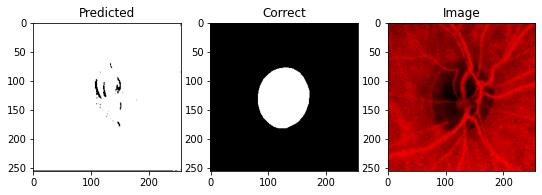

IOU: 0.10590687394142151
Dice: 0.19152946393924275
image #11


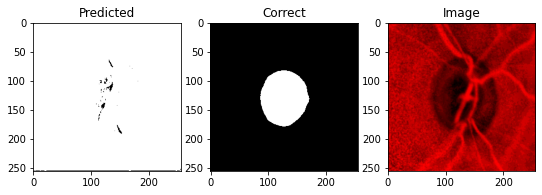

IOU: 0.09171076118946075
Dice: 0.1680129240710824
image #12


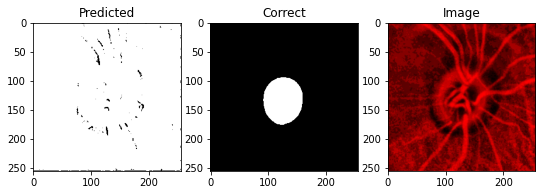

IOU: 0.06684909760951996
Dice: 0.12532061964728217
image #13


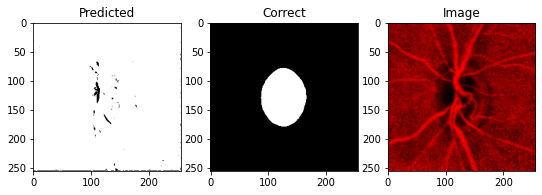

IOU: 0.0872608944773674
Dice: 0.16051509417977464
image #14


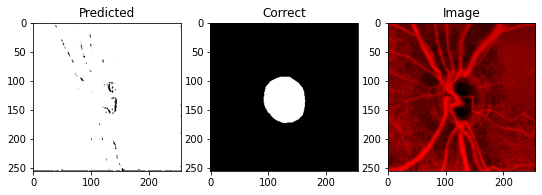

IOU: 0.066370390355587
Dice: 0.12447905400533564
image #15


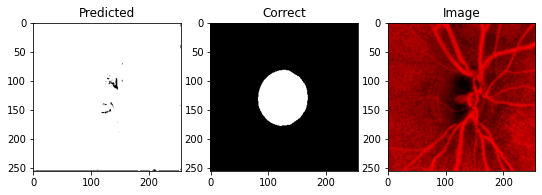

IOU: 0.09515345841646194
Dice: 0.17377191386957314
image #16


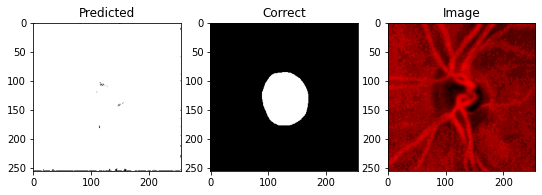

IOU: 0.08963551372289658
Dice: 0.16452384301589534
image #17


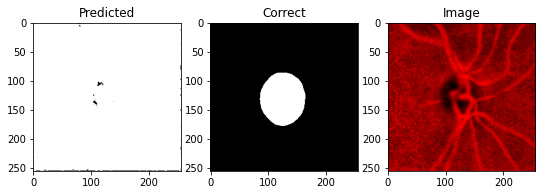

IOU: 0.08517877012491226
Dice: 0.15698569390896638
image #18


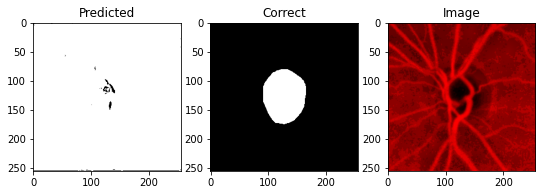

IOU: 0.08088269084692001
Dice: 0.14966044262969105
image #19


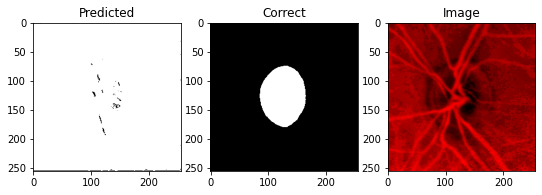

IOU: 0.09531910717487335
Dice: 0.17404810881155283
image #20


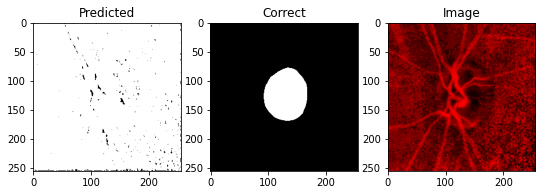

IOU: 0.08011883497238159
Dice: 0.148351884481499
image #21


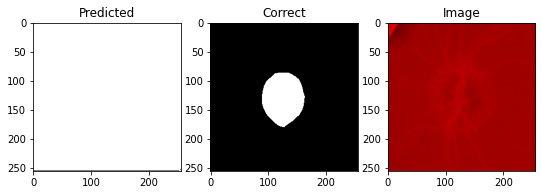

IOU: 0.08033334463834763
Dice: 0.1487195485096849
image #22


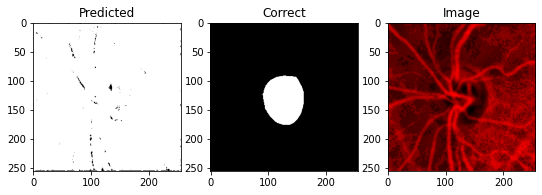

IOU: 0.07181035727262497
Dice: 0.13399824669818777
image #23


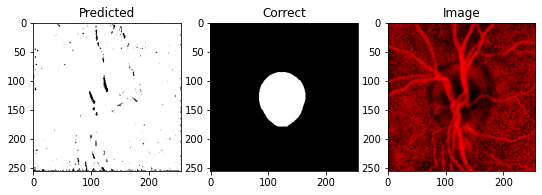

IOU: 0.08598662167787552
Dice: 0.15835668134255818
image #24


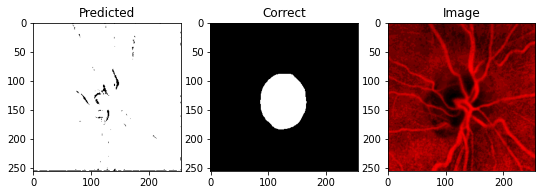

IOU: 0.08678822219371796
Dice: 0.15971505703099603
image #25


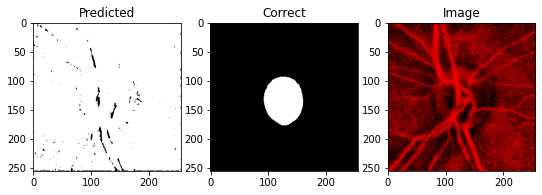

IOU: 0.06519881635904312
Dice: 0.12241623269587035
image #26


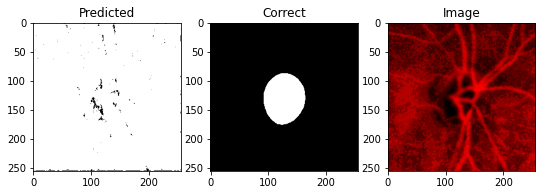

IOU: 0.07075972110033035
Dice: 0.13216732003618661
image #27


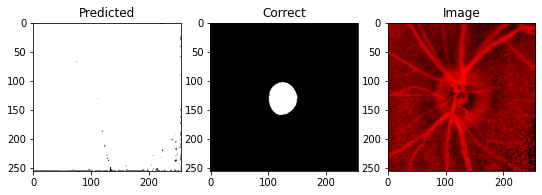

IOU: 0.03292383253574371
Dice: 0.06374881065651761
image #28


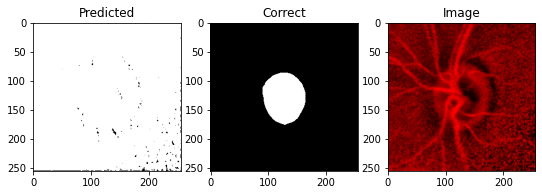

IOU: 0.07847069948911667
Dice: 0.14552217453505006
image #29


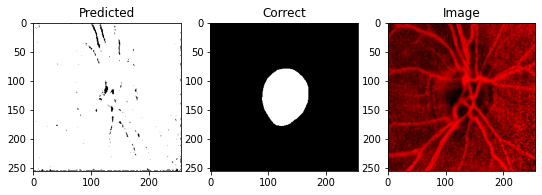

IOU: 0.09025885909795761
Dice: 0.1655732583567635
image #30


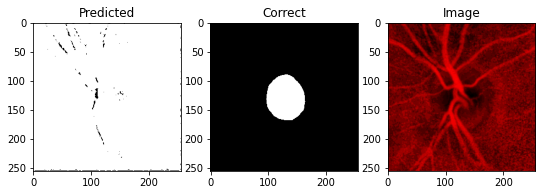

IOU: 0.06082601472735405
Dice: 0.11467670003050685
image #31


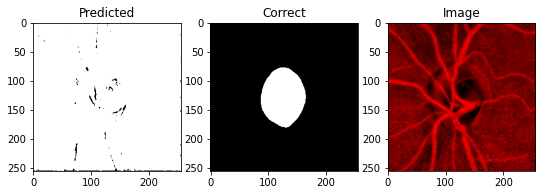

IOU: 0.08822579681873322
Dice: 0.1621461180760696
image #32


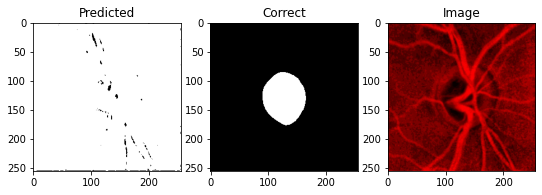

IOU: 0.07662923634052277
Dice: 0.14235028183925147
image #33


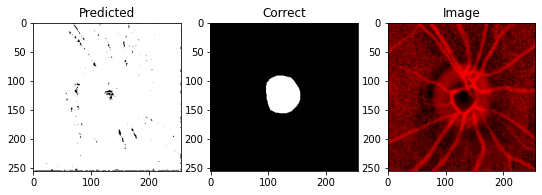

IOU: 0.04652637243270874
Dice: 0.08891581218049112
image #34


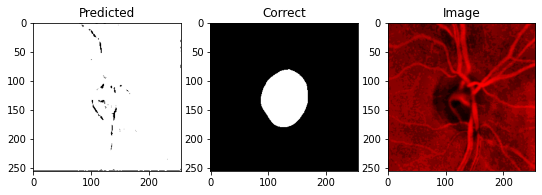

IOU: 0.08975284546613693
Dice: 0.1647214704555706
image #35


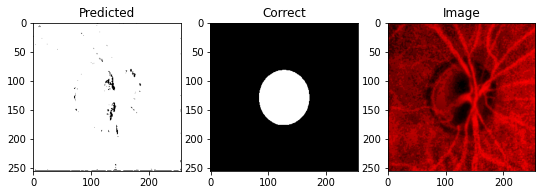

IOU: 0.09555353969335556
Dice: 0.1744388327721661
image #36


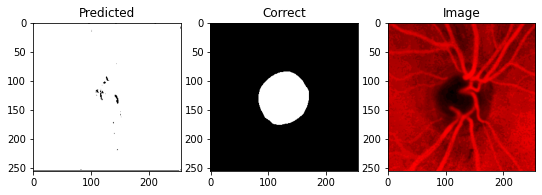

IOU: 0.09166283160448074
Dice: 0.1679325012985919
image #37


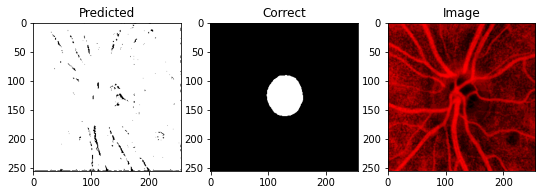

IOU: 0.05097868666052818
Dice: 0.09701183431952663
image #38


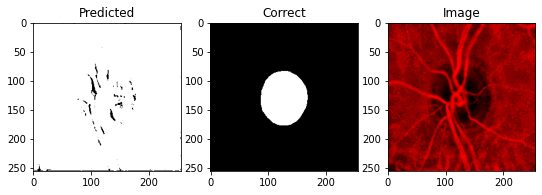

IOU: 0.08393879979848862
Dice: 0.15487737336154622
image #39


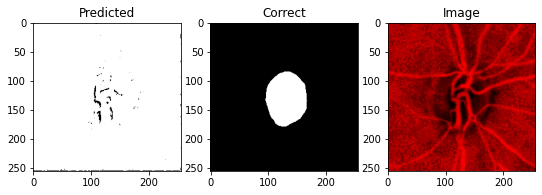

IOU: 0.07351407408714294
Dice: 0.13695968916949977
image #40


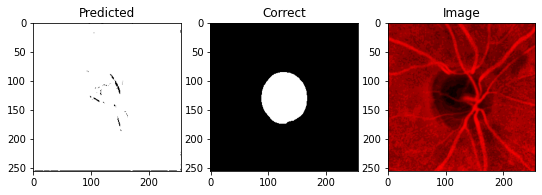

IOU: 0.08136611431837082
Dice: 0.1504876389203901
image #41


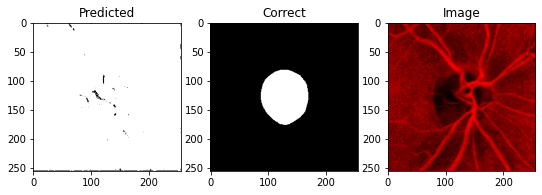

IOU: 0.08962322026491165
Dice: 0.16450313969532285
image #42


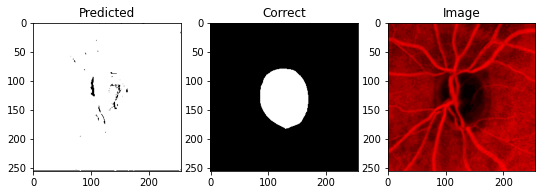

IOU: 0.09700211137533188
Dice: 0.1768494586098498
image #43


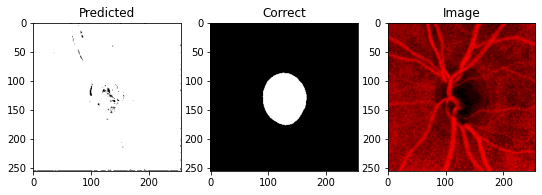

IOU: 0.0765136256814003
Dice: 0.14215078584761823
image #44


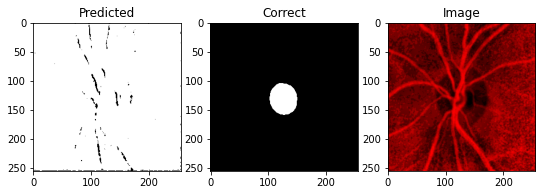

IOU: 0.029445933178067207
Dice: 0.05720734276256395
image #45


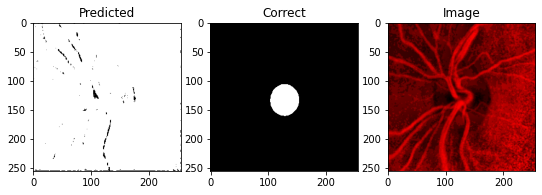

IOU: 0.03198663517832756
Dice: 0.06199040767386091
image #46


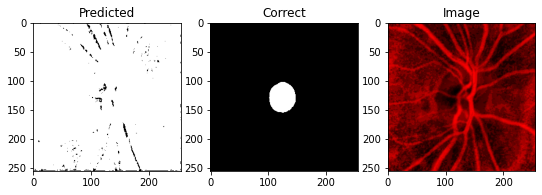

IOU: 0.026471732184290886
Dice: 0.05157810203494098
image #47


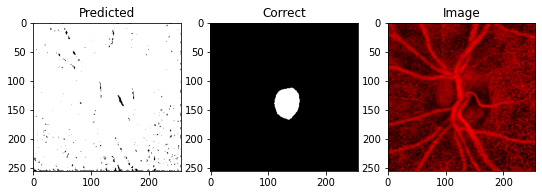

IOU: 0.027361907064914703
Dice: 0.053266346866819
image #48


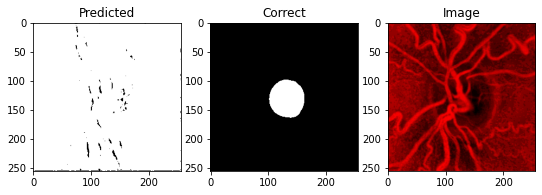

IOU: 0.045900020748376846
Dice: 0.08777133413018136
image #49


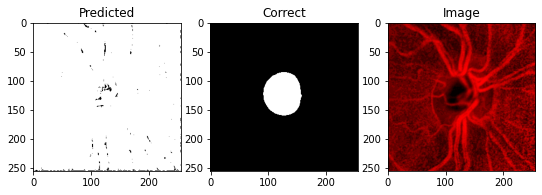

IOU: 0.05726620927453041
Dice: 0.10832883664629789
image #50


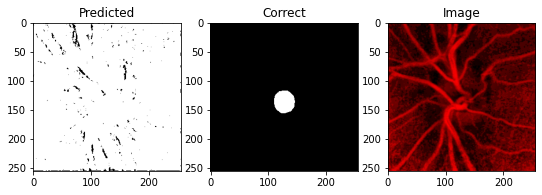

IOU: 0.017275163903832436
Dice: 0.03396360162113017


In [9]:
pred_iou, pred_dice, pred_cup = predict(hue_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.07505746
0.13865504276923662


### Training and Test disc

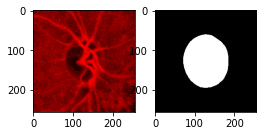

In [11]:
X_test, Z_test = next(data_generator(lab_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
model_disc = create_compile_model(img_size)

history_disc = train(lab_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_lab', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

3/3 [==============================] - 10s 4s/step - loss: 1.0056 - mean_IOU_gpu: 0.1411 - dice_metric: 0.2472 - val_loss: 1.0098 - val_mean_IOU_gpu: 0.1401 - val_dice_metric: 0.2454


image #0


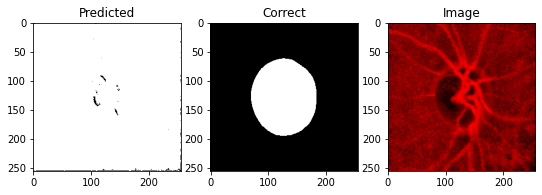

IOU: 0.17996163666248322
Dice: 0.30502964735254345
image #1


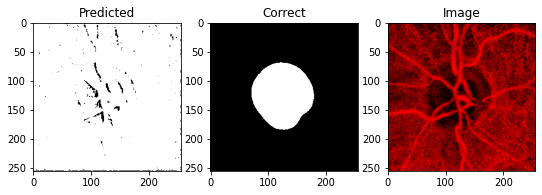

IOU: 0.13093693554401398
Dice: 0.23155480312380536
image #2


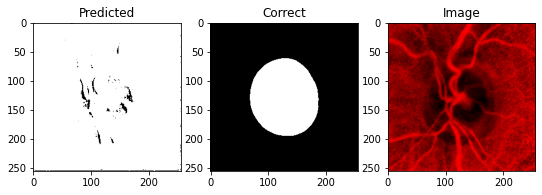

IOU: 0.18205974996089935
Dice: 0.30803815067959145
image #3


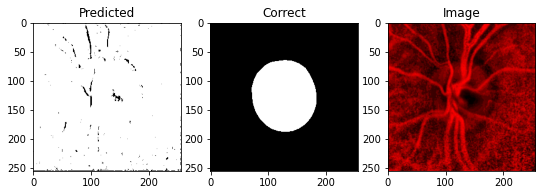

IOU: 0.166038379073143
Dice: 0.28479059124048745
image #4


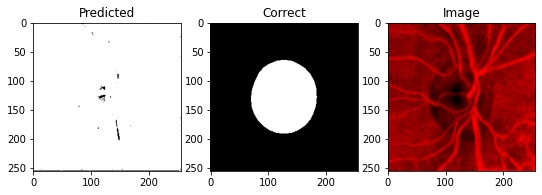

IOU: 0.17176426947116852
Dice: 0.29317205990156037
image #5


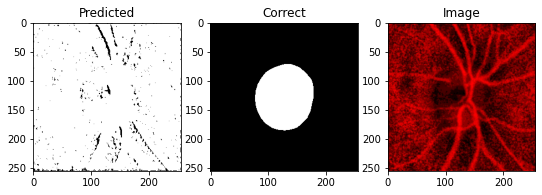

IOU: 0.13971608877182007
Dice: 0.24517700462232556
image #6


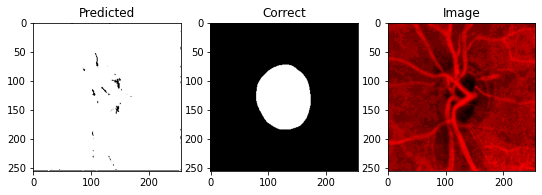

IOU: 0.1239713802933693
Dice: 0.2205952657387551
image #7


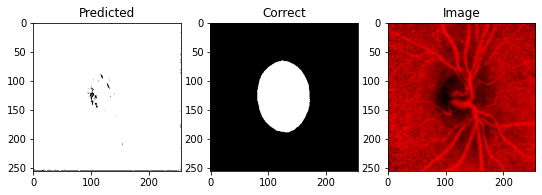

IOU: 0.13092319667339325
Dice: 0.23153330171420827
image #8


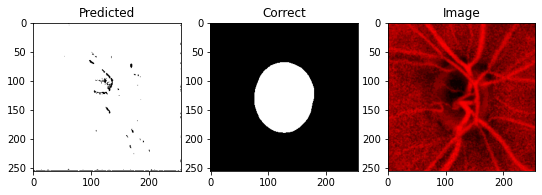

IOU: 0.14676009118556976
Dice: 0.2559560498459065
image #9


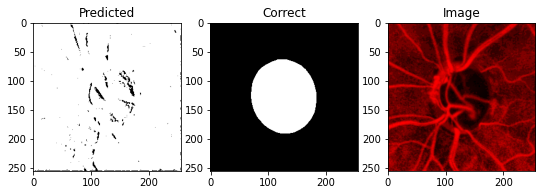

IOU: 0.16317784786224365
Dice: 0.2805724774547099
image #10


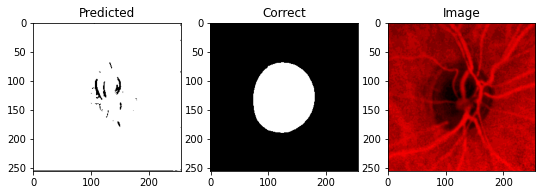

IOU: 0.14813850820064545
Dice: 0.2580498805695299
image #11


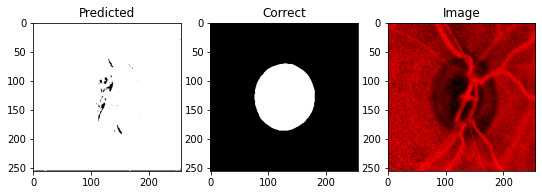

IOU: 0.13976812362670898
Dice: 0.24525712440461775
image #12


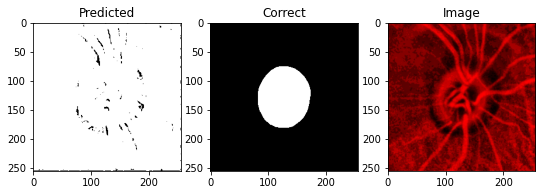

IOU: 0.11738044023513794
Dice: 0.210099326248524
image #13


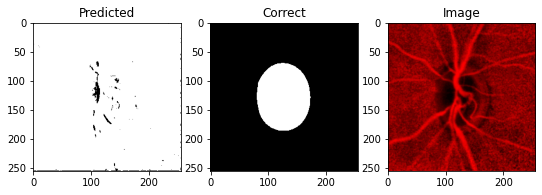

IOU: 0.12434151023626328
Dice: 0.22118103460051636
image #14


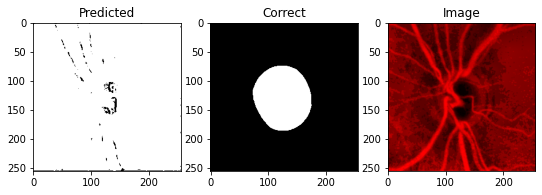

IOU: 0.12942372262477875
Dice: 0.22918541547356078
image #15


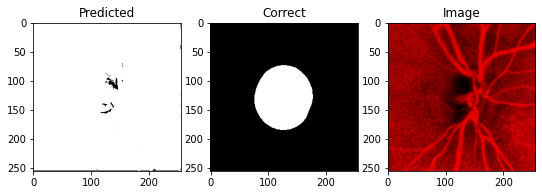

IOU: 0.12957315146923065
Dice: 0.2294196664812277
image #16


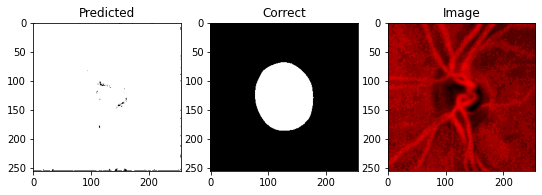

IOU: 0.1432536095380783
Dice: 0.2506068693587973
image #17


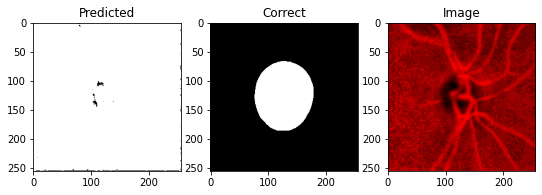

IOU: 0.1456519067287445
Dice: 0.25426904341309353
image #18


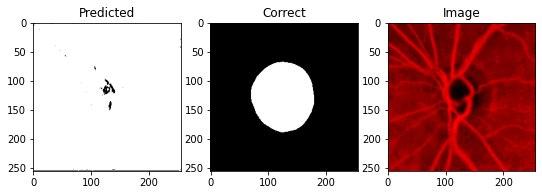

IOU: 0.15253743529319763
Dice: 0.26469845069486003
image #19


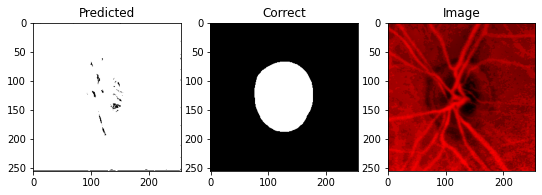

IOU: 0.1452772617340088
Dice: 0.25369797732353455
image #20


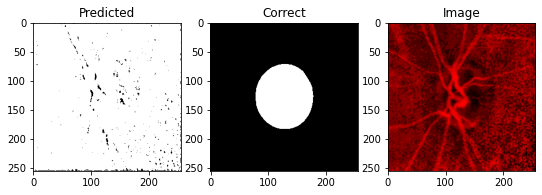

IOU: 0.13200750946998596
Dice: 0.23322727522080203
image #21


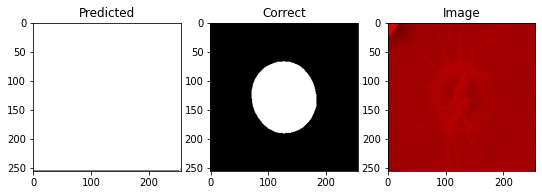

IOU: 0.1676521897315979
Dice: 0.2871611870588544
image #22


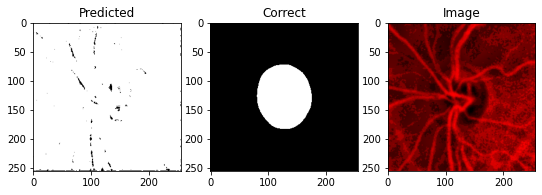

IOU: 0.12491510808467865
Dice: 0.22208806136029965
image #23


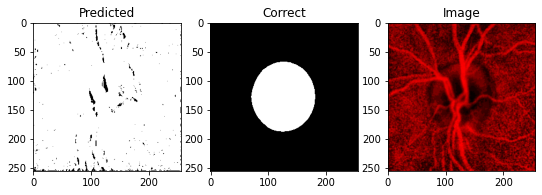

IOU: 0.15427297353744507
Dice: 0.26730761440512035
image #24


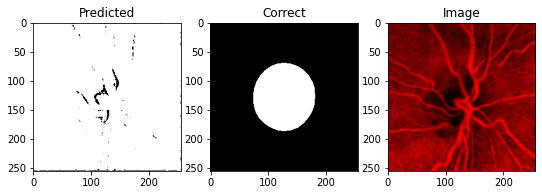

IOU: 0.14274735748767853
Dice: 0.24983186721545209
image #25


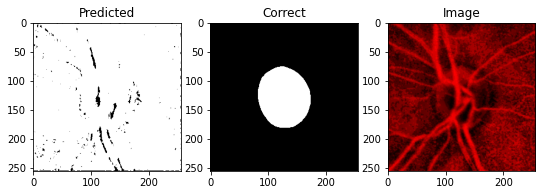

IOU: 0.11240219324827194
Dice: 0.20208912475781315
image #26


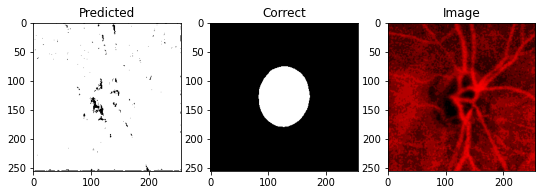

IOU: 0.10307943820953369
Dice: 0.1868939499790415
image #27


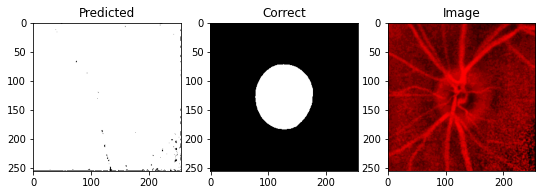

IOU: 0.13491074740886688
Dice: 0.2377468910021946
image #28


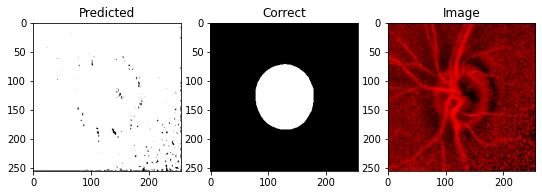

IOU: 0.1386524736881256
Dice: 0.24353782174988448
image #29


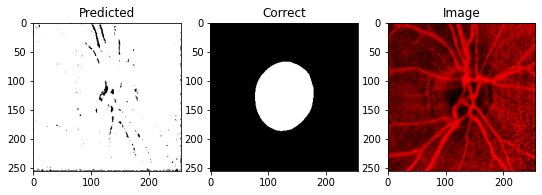

IOU: 0.1406308263540268
Dice: 0.24658429045778674
image #30


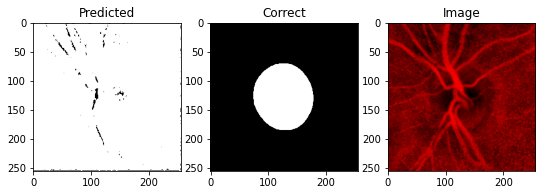

IOU: 0.14051909744739532
Dice: 0.24641251962960958
image #31


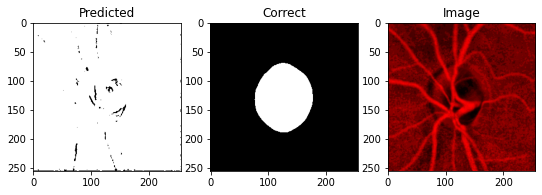

IOU: 0.13422301411628723
Dice: 0.23667835113176272
image #32


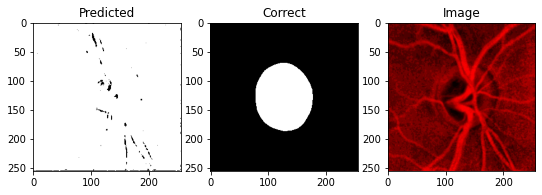

IOU: 0.13785922527313232
Dice: 0.24231332357247437
image #33


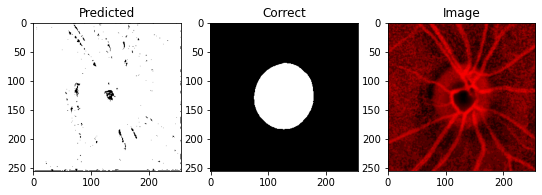

IOU: 0.13906101882457733
Dice: 0.244167814242668
image #34


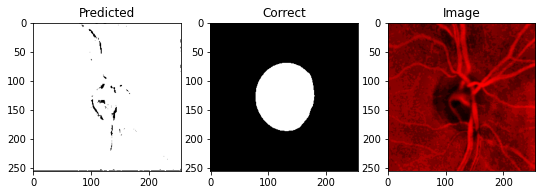

IOU: 0.13835984468460083
Dice: 0.24308631306038672
image #35


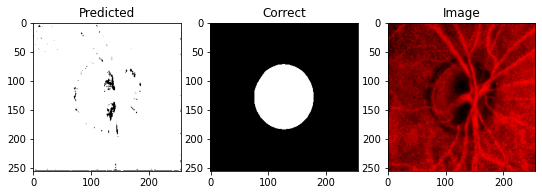

IOU: 0.1312616467475891
Dice: 0.23206239875855872
image #36


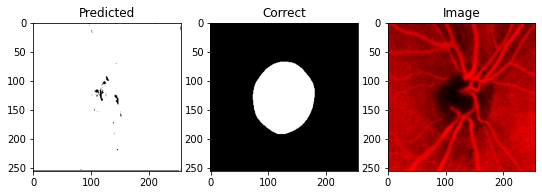

IOU: 0.1536339372396469
Dice: 0.26634781453434303
image #37


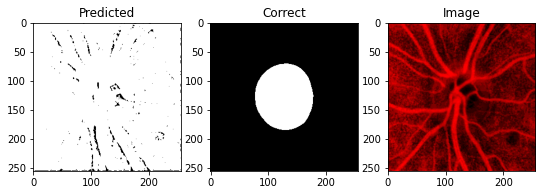

IOU: 0.13804255425930023
Dice: 0.24259648255694222
image #38


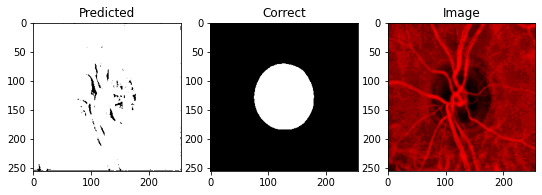

IOU: 0.12953972816467285
Dice: 0.2293672814319134
image #39


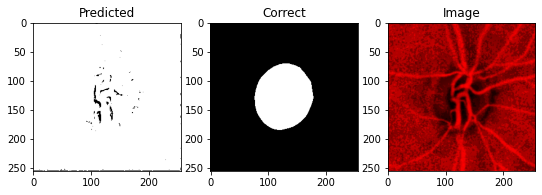

IOU: 0.12881158292293549
Dice: 0.22822512704840067
image #40


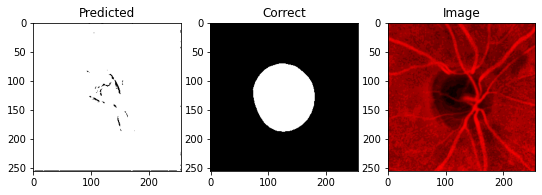

IOU: 0.14400649070739746
Dice: 0.2517581814041339
image #41


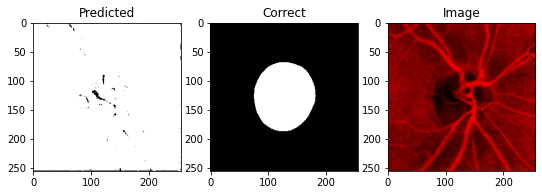

IOU: 0.1478007286787033
Dice: 0.2575372515449025
image #42


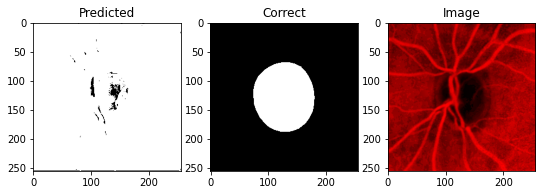

IOU: 0.14276514947414398
Dice: 0.24985911713404
image #43


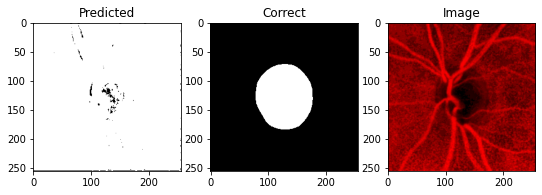

IOU: 0.12873856723308563
Dice: 0.22811050505325298
image #44


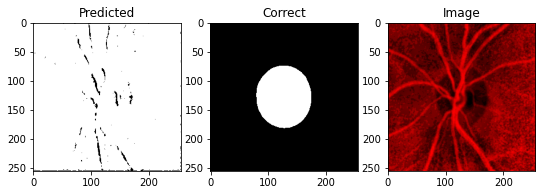

IOU: 0.11846301704645157
Dice: 0.21183179691609225
image #45


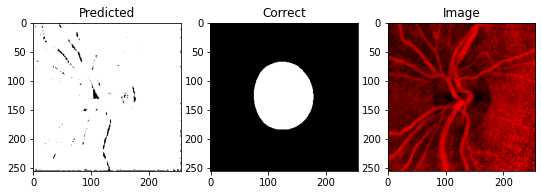

IOU: 0.14306265115737915
Dice: 0.25031461860106363
image #46


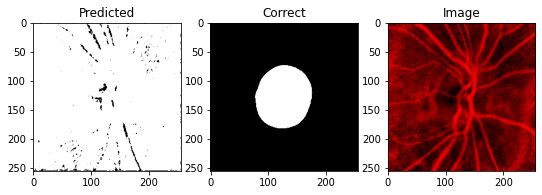

IOU: 0.1268482804298401
Dice: 0.22513815990446834
image #47


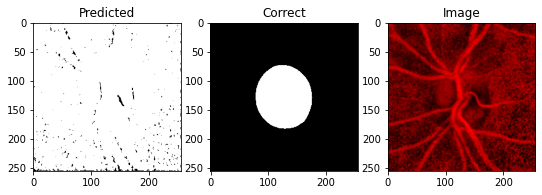

IOU: 0.12903830409049988
Dice: 0.2285809119449016
image #48


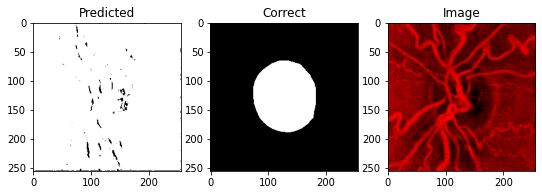

IOU: 0.15908002853393555
Dice: 0.27449361441451037
image #49


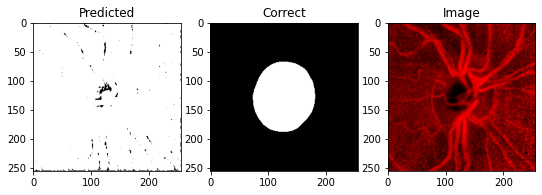

IOU: 0.15383069217205048
Dice: 0.2666434344382045
image #50


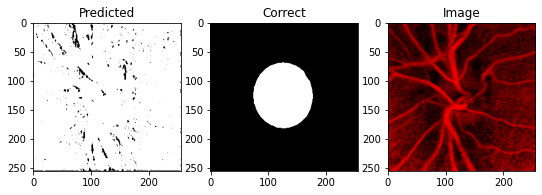

IOU: 0.138809934258461
Dice: 0.24378068058906732


In [13]:
pred_iou, pred_dice, pred_disc = predict(hue_channel_test, X_test, Z_test, model_disc, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.14050356
0.2460521161051196


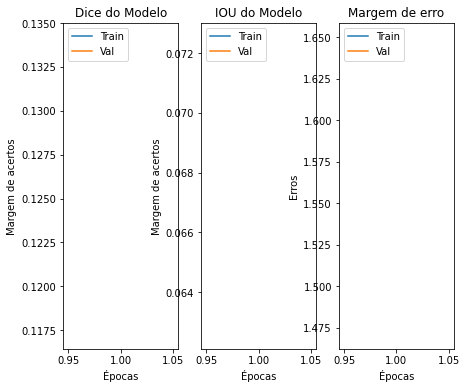

In [15]:
plot_results(history_cup, epochs)

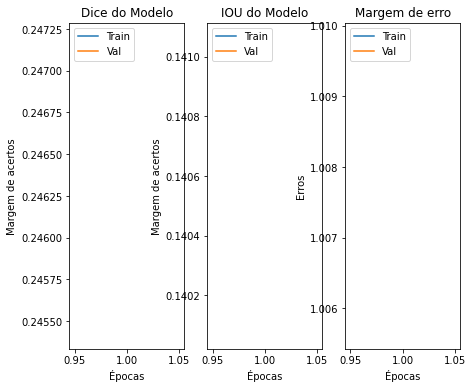

In [16]:
plot_results(history_disc, epochs)

In [ ]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)

In [ ]:
pd.DataFrame(data= result)

In [ ]:
cup = np.array(diametros_cup)
disc = np.array(diametros_disc)
pd.DataFrame(data={'cup - dm': cup[:,0], 'cup - dM': cup[:,1], 'disc - dm': disc[:,0], 'disc - dM': disc[:,1]})